# 0. Prepare the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("metals_daily_train.csv")

In [3]:
df = df.dropna()

In [4]:
#Only keep the settle prices
cols1 = [c for c in df.columns if c[5:] != 'open']
df = df[cols1]

In [5]:
cols2 = [c for c in df.columns if c[5:] != 'high']
df = df[cols2]

In [6]:
cols3 = [c for c in df.columns if c[5:] != 'low']
df = df[cols3]

In [7]:
df.head()

,date,p0,p1,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,...,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,week,week_date
109,20081201,444.511058,457.032497,457.032497,56.29,51.91,0.6421,31.40,31.83,1.4924,...,12545.0,12560.0,28410.0,27300.0,11655.0,10690.0,9540.0,9650.0,2030,20081201
110,20081202,446.908899,465.530103,459.323035,55.30,51.78,0.6354,30.77,31.20,1.4895,...,12185.0,12215.0,28260.0,27040.0,11190.0,10300.0,9510.0,9630.0,2030,20081201
111,20081203,453.484820,482.060575,459.696940,55.21,51.21,0.6387,30.58,30.98,1.4734,...,11715.0,11830.0,27800.0,26530.0,10605.0,10050.0,9500.0,9590.0,2030,20081201
112,20081204,447.532919,472.395859,459.964389,57.62,53.94,0.6413,29.50,29.87,1.4746,...,11250.0,11240.0,26760.0,25530.0,10055.0,9735.0,9145.0,9225.0,2030,20081201
113,20081205,447.084228,471.922241,459.503235,56.75,53.58,0.6404,28.55,28.93,1.4696,...,10685.0,10590.0,25450.0,24270.0,9965.0,9150.0,8665.0,8715.0,2030,20081201


In [8]:
type(df['date'])

pandas.core.series.Series

In [9]:
import datetime

In [10]:
df.tail()

,date,p0,p1,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,...,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,week,week_date
2628,20180514,555.885726,581.521233,582.870470,14.475,14.975,0.7527,31.25,31.35,1.3585,...,14590.0,14660.0,51370.0,51570.0,11400.0,11495.0,23755.0,23665.0,2523,20180514
2629,20180515,558.735883,584.378351,581.679143,15.325,15.775,0.7471,31.12,31.23,1.3527,...,14635.0,14705.0,51050.0,51270.0,11160.0,11475.0,23760.0,23640.0,2523,20180514
2630,20180516,560.979551,583.904196,583.904196,14.675,15.325,0.7517,30.59,30.71,1.3504,...,14680.0,14740.0,50780.0,50940.0,11135.0,11345.0,23890.0,23790.0,2523,20180514
2631,20180517,558.631274,584.145683,582.802820,14.375,15.075,0.7509,30.94,31.06,1.3524,...,14795.0,14865.0,50920.0,51070.0,11140.0,11305.0,23845.0,23755.0,2523,20180514
2632,20180518,559.704335,585.267754,585.267754,14.525,15.325,0.7511,30.98,31.09,1.3499,...,14750.0,14825.0,51050.0,51240.0,11365.0,11510.0,23815.0,23700.0,2523,20180514


In [11]:
df.describe()

,date,p0,p1,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,...,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,week,week_date
count,2.105000e+03,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.00000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2.105000e+03
mean,2.013256e+07,476.796242,498.505181,485.130214,20.299921,21.114874,0.86789,39.988999,40.233507,1.512793,...,14335.937292,14366.483610,50205.027078,50140.725891,18820.034204,18892.666983,16969.374347,17000.531116,2278.507838,2.013254e+07
std,2.758313e+04,100.080426,97.873163,98.627432,7.643242,7.188937,0.11923,8.979768,9.028143,0.123639,...,1706.654226,1747.768281,10000.795538,10098.870097,7538.568491,7417.782791,3652.320398,3625.653120,143.388561,2.758300e+04
min,2.008120e+07,227.076039,261.009561,248.225419,11.175000,12.125000,0.62680,26.050000,26.248000,1.214700,...,9825.000000,9735.000000,23470.000000,22460.000000,9600.000000,9020.000000,8665.000000,8715.000000,2030.000000,2.008120e+07
25%,2.011042e+07,420.745698,444.634823,429.469980,15.225000,16.250000,0.76170,32.660000,32.780000,1.439100,...,13135.000000,13160.000000,43620.000000,43550.000000,12935.000000,13107.000000,14785.000000,14814.000000,2154.000000,2.011042e+07
50%,2.013091e+07,488.135858,516.253262,497.672857,17.975000,18.750000,0.87320,36.950000,37.210000,1.548600,...,14372.000000,14380.000000,50764.000000,50740.000000,16330.000000,16475.000000,15775.000000,15845.000000,2278.000000,2.013090e+07
75%,2.016013e+07,555.246577,570.278054,561.198936,22.895000,24.100000,0.97950,49.168000,49.300000,1.605000,...,15694.000000,15770.000000,56190.000000,56100.000000,24060.000000,24135.000000,18182.000000,18325.000000,2403.000000,2.016012e+07
max,2.018052e+07,645.057249,669.933261,654.272352,57.620000,53.940000,1.09310,59.770000,60.390000,1.715300,...,18490.000000,18470.000000,75570.000000,76000.000000,42640.000000,42795.000000,26915.000000,26865.000000,2523.000000,2.018051e+07


In [12]:
#convert column "date" in to date format#
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y-%m-%d')

In [13]:
df = df.drop(df.columns[[1,3]], axis=1)

In [14]:
df.tail()

,date,p1,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,f006_settle,f007_settle,...,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,week,week_date
2628,2018-05-14,581.521233,14.475,14.975,0.7527,31.25,31.35,1.3585,1.3644,396.50,...,14590.0,14660.0,51370.0,51570.0,11400.0,11495.0,23755.0,23665.0,2523,20180514
2629,2018-05-15,584.378351,15.325,15.775,0.7471,31.12,31.23,1.3527,1.3587,402.25,...,14635.0,14705.0,51050.0,51270.0,11160.0,11475.0,23760.0,23640.0,2523,20180514
2630,2018-05-16,583.904196,14.675,15.325,0.7517,30.59,30.71,1.3504,1.3564,399.25,...,14680.0,14740.0,50780.0,50940.0,11135.0,11345.0,23890.0,23790.0,2523,20180514
2631,2018-05-17,584.145683,14.375,15.075,0.7509,30.94,31.06,1.3524,1.3583,395.25,...,14795.0,14865.0,50920.0,51070.0,11140.0,11305.0,23845.0,23755.0,2523,20180514
2632,2018-05-18,585.267754,14.525,15.325,0.7511,30.98,31.09,1.3499,1.3558,402.50,...,14750.0,14825.0,51050.0,51240.0,11365.0,11510.0,23815.0,23700.0,2523,20180514


In [15]:
type(df['date'])

pandas.core.series.Series

In [16]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


# I. Descriptive Analysis: Dependent Variable (p1)

In [17]:
df['p1'].describe()

count    2105.000000
mean      498.505181
std        97.873163
min       261.009561
25%       444.634823
50%       516.253262
75%       570.278054
max       669.933261
Name: p1, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

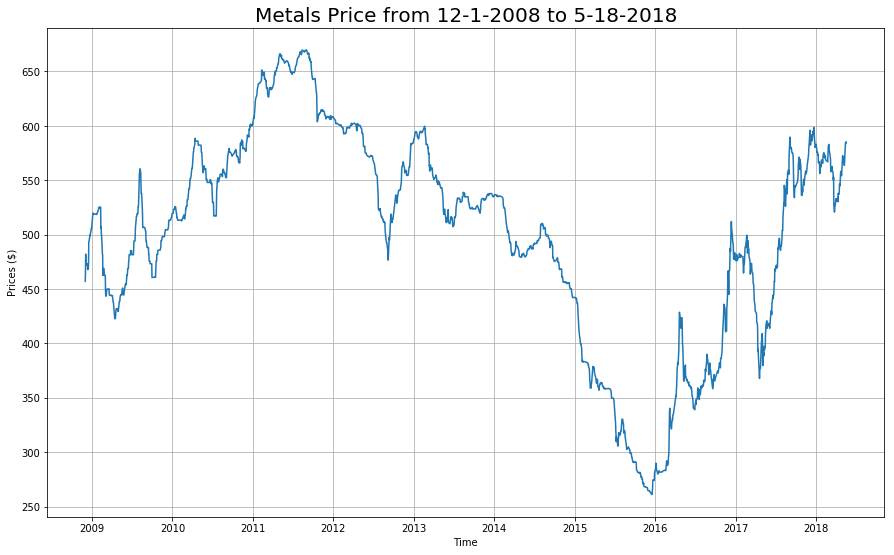

In [68]:
#line chart
x = df['date']
y = df['p1']
plot(x,y)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Prices ($)')
plt.title('Metals Price from 12-1-2008 to 5-18-2018',fontsize=20)
plt.show

# II. Check for the Stationary of p1
### 1. Augmented Dickey-Fuller test

In [19]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

In [20]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [21]:
#check the stationary of p1
adf_test(df['p1'])

Results of Augmented Dickey-Fuller test:
test statistic            -1.514302
p-value                    0.526425
# of lags                 10.000000
# of observations       2094.000000
Critical Value (1%)       -3.433477
Critical Value (5%)       -2.862921
Critical Value (10%)      -2.567505
dtype: float64


###  => p-value = 0.526 > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary

### =>The time series of p1 is not stationary and will require differencing to make it stationary, at least a difference order of 1

In [22]:
#filter dataset, only keep 'date' and 'p1' values
p1data = df.iloc[:,0:2]

In [23]:
p1data.head()

,date,p1
109,2008-12-01,457.032497
110,2008-12-02,465.530103
111,2008-12-03,482.060575
112,2008-12-04,472.395859
113,2008-12-05,471.922241


### 2. Check the stationary of difference order of 1 of p1

In [44]:
p1diff = np.diff(df['p1'])

<function matplotlib.pyplot.show(*args, **kw)>

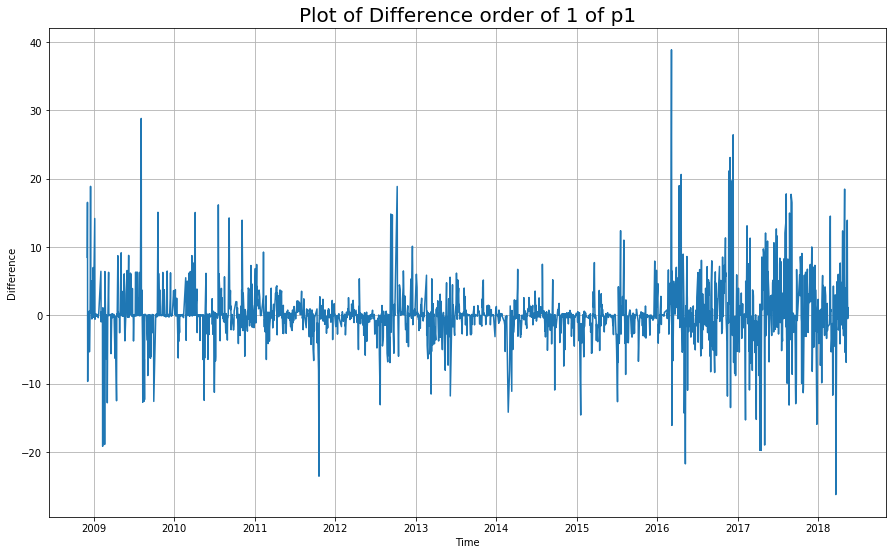

In [67]:
x = df['date'][1:,]
y = p1diff
plot(x,y)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Plot of Difference order of 1 of p1',fontsize=20)
plt.show

In [42]:
adf_test(p1diff)

Results of Augmented Dickey-Fuller test:
test statistic         -1.147739e+01
p-value                 5.091750e-21
# of lags               9.000000e+00
# of observations       2.094000e+03
Critical Value (1%)    -3.433477e+00
Critical Value (5%)    -2.862921e+00
Critical Value (10%)   -2.567505e+00
dtype: float64


### => p-value <0.05 => the difference order of 1 of p1 is stationary

# III. Autocorrelation plot of the time series of p1
#### (To quantify the strength and type of relationship between observations of p1 and their lags.)

In [24]:
from pandas import Series
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [25]:
p1series = pd.Series(p1data['p1'].values, index=pd.to_datetime(p1data.date))

In [26]:
p1series.head()

date
2008-12-01    457.032497
2008-12-02    465.530103
2008-12-03    482.060575
2008-12-04    472.395859
2008-12-05    471.922241
dtype: float64

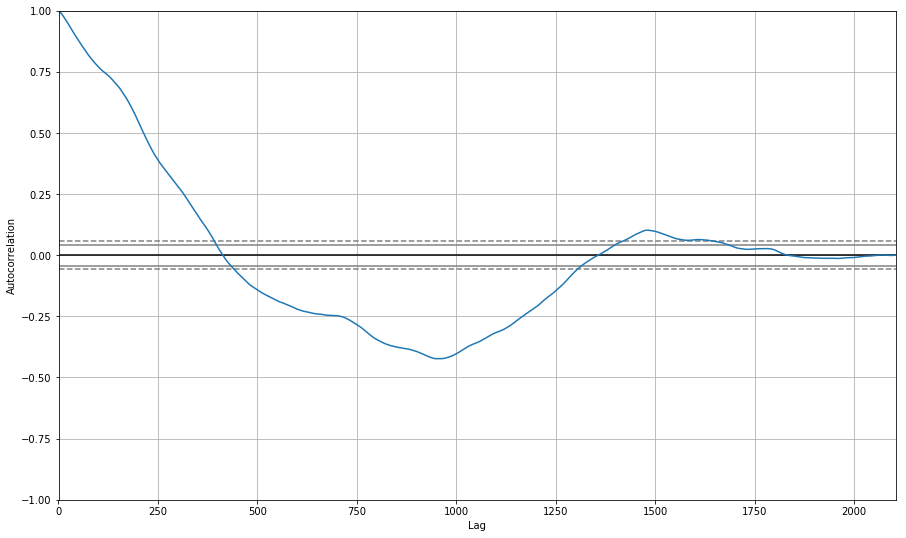

In [66]:
autocorrelation_plot(p1data['p1'])
pyplot.show()

In [54]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


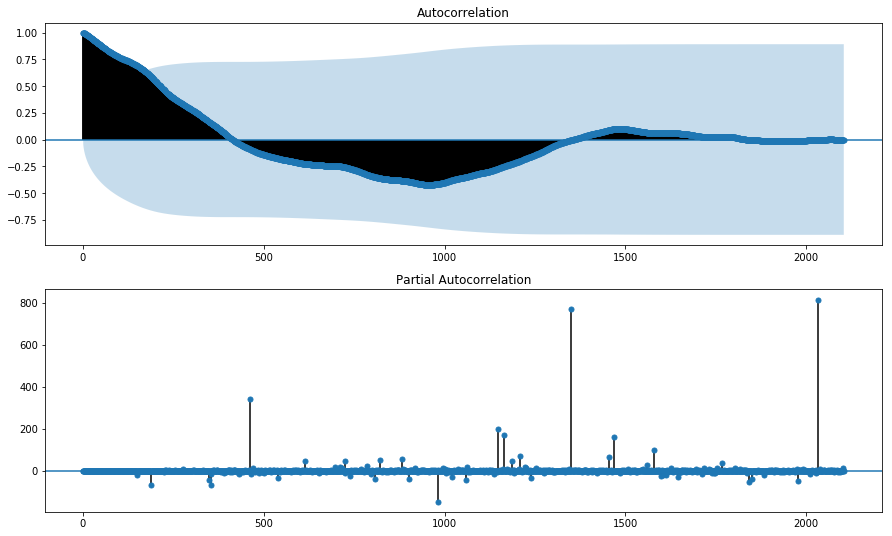

In [55]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(p1series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(p1series, ax=pyplot.gca())
pyplot.show()

### We can see that there is a positive correlation with the first 50 lags that is perhaps significant for the first 10 lags.

#### => A good starting point for the AR parameter of the model may be 10.

# IV. ARIMA model

In [29]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot

### 1. Fit Model:
We will fit an ARIMA(10,1,0) model, which sets:
- The lag value to 10 for autoregression
- Uses a difference order of 1 to make the time series of p1 stationary
- Uses a moving average model of 0.

In [30]:
model = ARIMA(p1series, order=(10,1,0))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [31]:
model_fit = model.fit(disp=0)

### 2. Print a summary of the fit model

In [32]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2104
Model:                ARIMA(10, 1, 0)   Log Likelihood               -5931.839
Method:                       css-mle   S.D. of innovations              4.057
Date:                Mon, 22 Oct 2018   AIC                          11887.678
Time:                        02:41:47   BIC                          11955.498
Sample:                             1   HQIC                         11912.516
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0675      0.152      0.444      0.657      -0.230       0.365
ar.L1.D.y      0.1663      0.022      7.661      0.000       0.124       0.209
ar.L2.D.y      0.0262      0.022      1.185      0.2

### 3. Plot residual errors

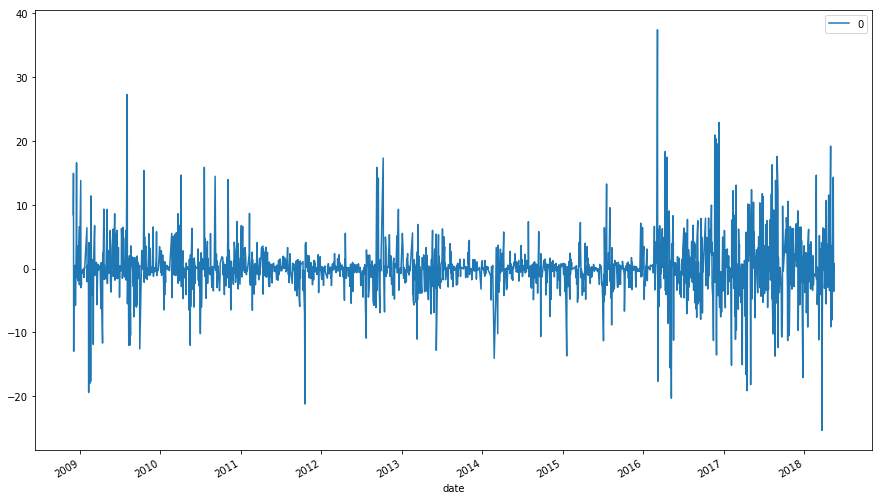

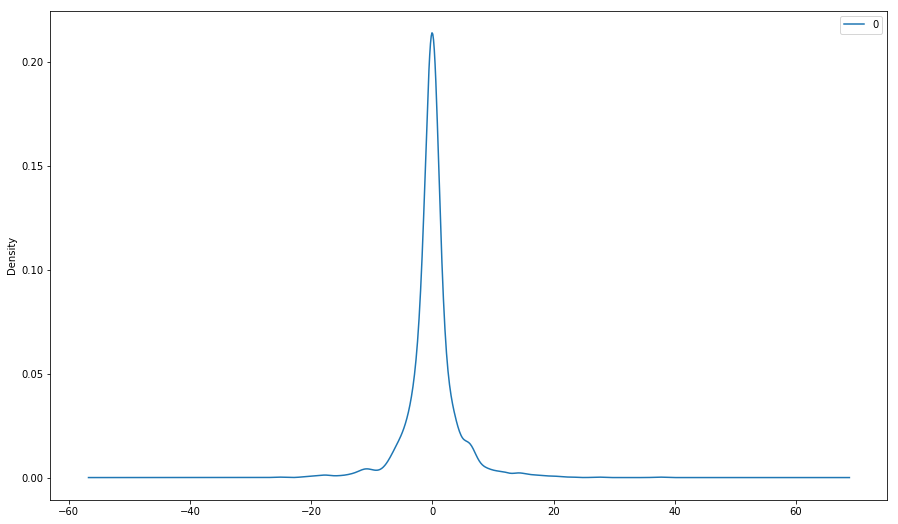

                 0
count  2104.000000
mean     -0.002922
std       4.058275
min     -25.367076
25%      -1.205481
50%      -0.036993
75%       0.971946
max      37.414837


In [34]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

### => The distribution of the residual errors is displayed. The results show that indeed there is not bias in the prediction (a zero mean in the residuals).

# V. Forecast p1 with ARIMA Model

- We will split the training dataset into train and test sets (95%)
- Then use the train set to fit the model and generate a prediction for each element on the test set.

In [56]:
from sklearn.metrics import mean_squared_error

In [60]:
X = p1series.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=582.868353, expected=583.453291
predicted=584.370473, expected=593.461451
predicted=595.703541, expected=595.975215
predicted=597.690517, expected=587.773966
predicted=587.335796, expected=582.325078
predicted=581.948512, expected=584.704291
predicted=585.168928, expected=591.747780
predicted=592.956691, expected=591.658341
predicted=592.903772, expected=586.993236
predicted=586.515207, expected=586.342415
predicted=585.877473, expected=586.925700
predicted=587.923901, expected=594.242002
predicted=596.309660, expected=594.817382
predicted=594.598901, expected=592.518075
predicted=591.556107, expected=596.257607
predicted=597.236155, expected=598.619125
predicted=599.971856, expected=582.682290
predicted=580.345344, expected=580.149177
predicted=579.396187, expected=580.770683
predicted=579.401426, expected=583.117718
predicted=582.842068, expected=580.596237
predicted=581.480779, expected=579.498296
predicted=578.948165, expected=575.374372
predicted=573.465235, expected=576

### => Mean Squared Error score (MSE) of the predictions: 32.136
### => This is a great start, but we may be able to get improved results with a better configured ARIMA model.

(MSE will be a reference point of comparison for other ARIMA configurations as well as other models' performance)

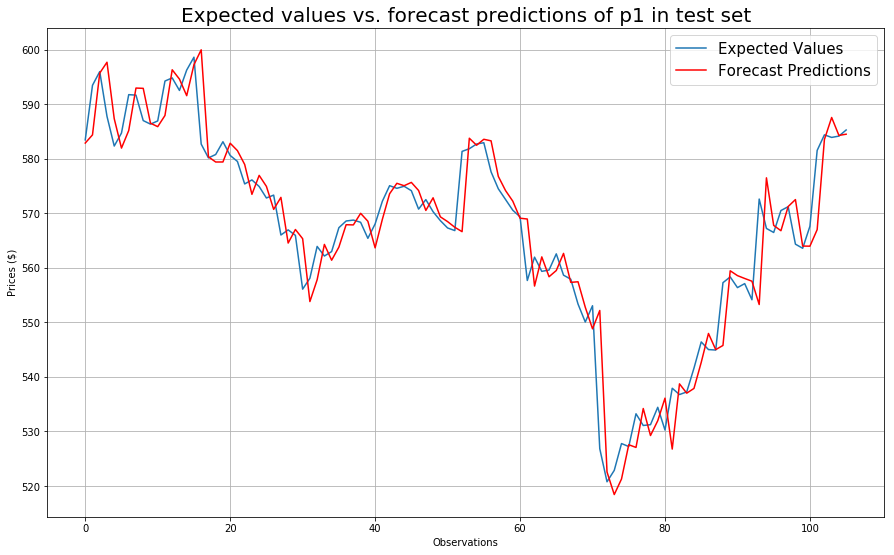

In [79]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.grid()
pyplot.xlabel('Observations')
pyplot.ylabel('Prices ($)')
pyplot.title('Expected values vs. forecast predictions of p1 in test set',fontsize=20)
pyplot.legend(['Expected Values','Forecast Predictions'],fontsize=15)
pyplot.show()

### A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red).
### We can see that our predictions of p1 are quite close to the expected values of p1 